In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import sklearn as skl
import os

In [167]:
DATA_FILE_PATH = os.path.join(os.path.dirname(os.path.abspath(__name__)), "data/Iris.csv")

1. Creating dataframe from dataset:

In [168]:
iris_df = pd.read_csv(DATA_FILE_PATH)

2. Showing first 5 records:

In [169]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


3. Show a dataframe which has sepal width greater than 4:

In [170]:
condition = iris_df['SepalWidthCm'] > 4
iris_df[condition]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


4. Show a dataframe which has petal width greater than 1:

In [171]:
condition = iris_df['PetalWidthCm'] > 1
iris_df[condition]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


5. Retrieve records which have petal width more than 2:

In [172]:
condition = iris_df['PetalWidthCm'] > 2
iris_petal_width_greater_than_two =iris_df[condition]

6. Figure out the relationship between sepal length and petal length and draw a scatter plot between tehm and show the relationship between them:

[Text(0.5, 1.0, 'Relationship between SepalLengthCm and PetalLengthCm')]

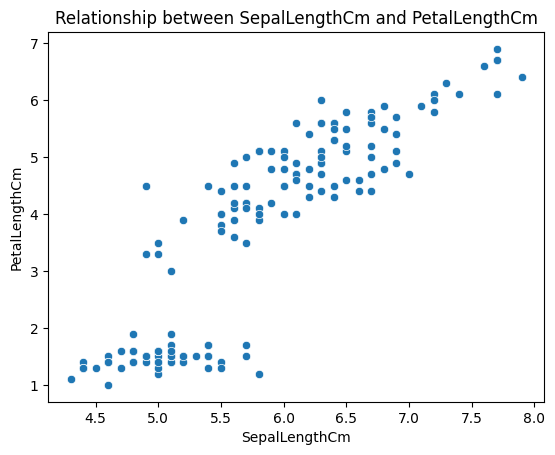

In [173]:
elements = ['SepalLengthCm', 'PetalLengthCm']
title = f"Relationship between {elements[0]} and {elements[1]}"

data = iris_df[elements]

sns_graph = sns.scatterplot(data=data, x=elements[0], y=elements[1])
sns_graph.set(title=title)

7. Now apply species as hue in the same scatter plot for better visibility and understanding:

[Text(0.5, 1.0, 'Relationship between SepalLengthCm and PetalLengthCm')]

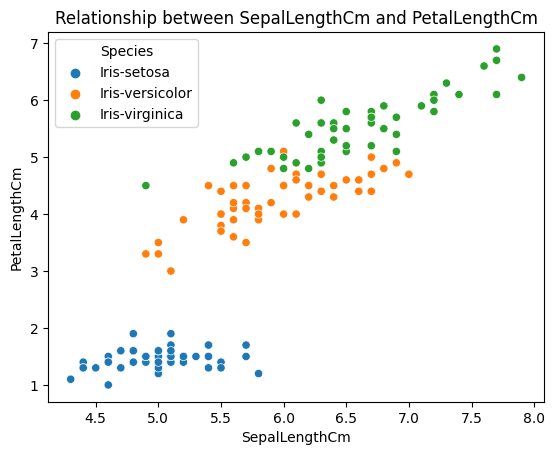

In [174]:
elements = ['SepalLengthCm', 'PetalLengthCm', 'Species']
title = f"Relationship between {elements[0]} and {elements[1]}"

data = iris_df[elements]

sns_graph = sns.scatterplot(data=data, x=elements[0], y=elements[1], hue=elements[2])
sns_graph.set(title=title)

Applying Linear Regression:

1. Model One:

- Create an object name as 'y' which is storing the dataframe of a dependent variable named as 'sepalLengthCm':

In [175]:
y = iris_df[['SepalLengthCm']]

- Create an object named as 'x' which stores the dataframe of an independent variable named as 'sepalWidthCm':

In [176]:
x = iris_df[['SepalWidthCm']]


- Divide the variables into 'x_train', 'x_test', 'y_train', 'y_test' variables using 'train_test_split' method carrying parameters named as 'x , y' and test size should be 30%

In [177]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x, y, test_size=0.3)

- Show first five records of all four variables / objects:

In [178]:
print(
    x_train.head(),
      x_test.head(),
      y_train.head(),
      y_test.head(),
      sep=os.linesep
      )


     SepalWidthCm
124           3.3
81            2.4
128           2.8
2             3.2
89            2.5
     SepalWidthCm
125           3.2
62            2.2
38            3.0
73            2.8
84            3.0
     SepalLengthCm
124            6.7
81             5.5
128            6.4
2              4.7
89             5.5
     SepalLengthCm
125            7.2
62             6.0
38             4.4
73             6.1
84             5.4


- Create an object names as lr and assign memory from linearregression() method:

In [179]:
lr = skl.linear_model.LinearRegression()

- Fit both training sets into fit method:

In [180]:
lr.fit(x_train, y_train)



LinearRegression()

- Predict 'x_test' from predict method and store the result into 'y_pred' object:

In [181]:
y_pred = lr.predict(x_test)

- Show first five records from actual and predicted objects:

In [182]:
y_test.head()

,SepalLengthCm
125,7.2
62,6.0
38,4.4
73,6.1
84,5.4


In [183]:
y_pred[:5]

array([[5.88473684],
       [6.04921053],
       [5.91763158],
       [5.95052632],
       [5.91763158]])

- Try to find out mean_squared_error in prediction using method after passing parameter as y_test and y_pred.

In [184]:
from sklearn.metrics import mean_squared_error

In [185]:
mean_squared_error(y_true=y_test, y_pred=y_pred).round(2)

0.65

Model 2:

- Create an object names as 'y' and store dataframe of 'sepalLengthCm' dependent variable:

In [186]:
y = iris_df[['SepalLengthCm']]

- Store 'SepalWidthCm' , 'PetalLengthCm', 'PetalWidthCm' dataframe in 'x' which is our independent variable:

In [187]:
x = iris_df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

- Perform train_test_split as in previous example:

In [188]:
test_size = .30
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x, y, test_size=test_size)

- Fit both train setes into fit method of 'linear_regression':

In [190]:
lr.fit(x_train, y_train)

LinearRegression()

- Predict x_test and store result into y_pred using the predict function:

In [191]:
y_pred = lr.predict(x_test)

- Find out 'mean_squared_error' of actual predicted test set:

In [192]:
mean_squared_error(y_true=y_test, y_pred=y_pred).round(2)

0.08

<Axes: >

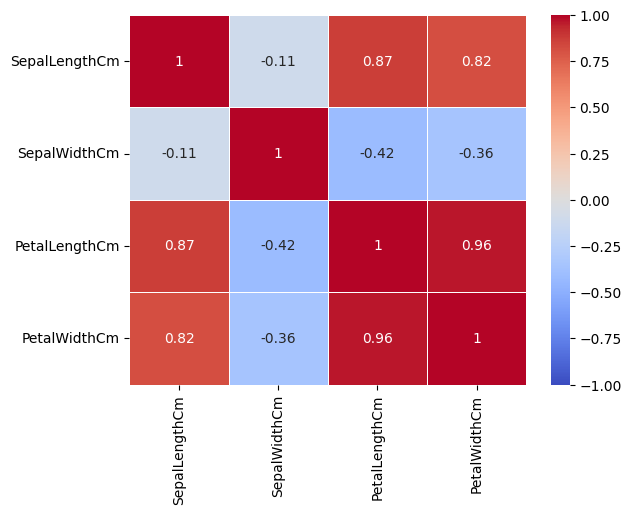

In [211]:
data=iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
sns.heatmap(data=data, vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5)

[Text(0.5, 1.0, 'Relationship between SepalLengthCm and PetalWidthCm')]

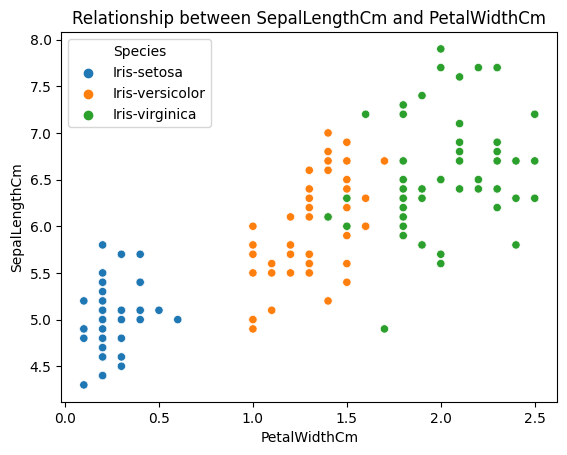

In [227]:
label_idx = 2
labels = ['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
independent_label = 'SepalLengthCm'

elements = [independent_label, labels[label_idx], 'Species']
title = f"Relationship between {elements[0]} and {elements[1]}"

sns_graph = sns.scatterplot(data=iris_df[elements], y=elements[0], x=elements[1], hue=elements[2])
sns_graph.set(title=title)

Model 3 Prediction:

- The following was done following instructions providead at "https://machinelearningmastery.com/machine-learning-in-python-step-by-step/"

In [232]:
iris_modified_df = iris_df.drop('Id', axis=1)

- Data visualization:

SepalLengthCm       Axes(0.125,0.53;0.352273x0.35)
SepalWidthCm     Axes(0.547727,0.53;0.352273x0.35)
PetalLengthCm       Axes(0.125,0.11;0.352273x0.35)
PetalWidthCm     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

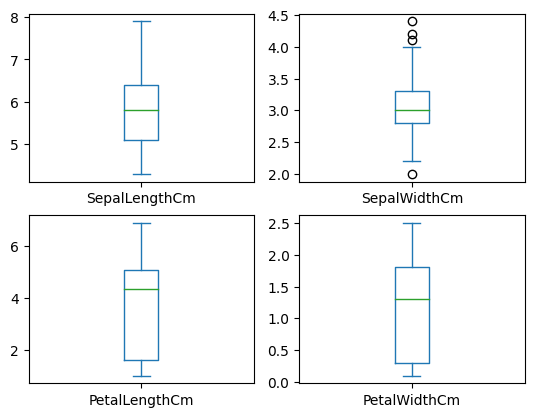

In [257]:
iris_modified_df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

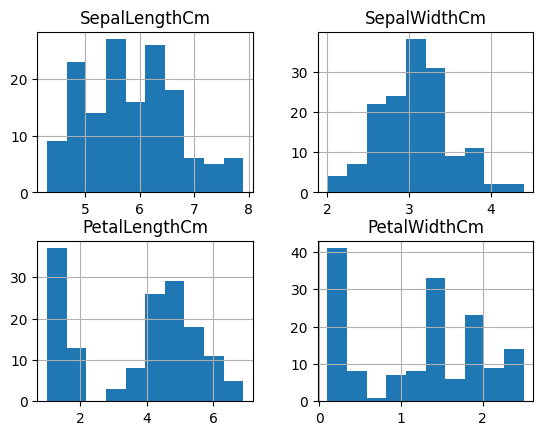

In [258]:
""" 
    According to source it looks that two of the input variables have Gaussian distribution. (Normal Distribution)
    It is also noted that there algorithms that could be sued that exploit this assumption.
"""
iris_modified_df.hist()

- Looking at the interactions between variables

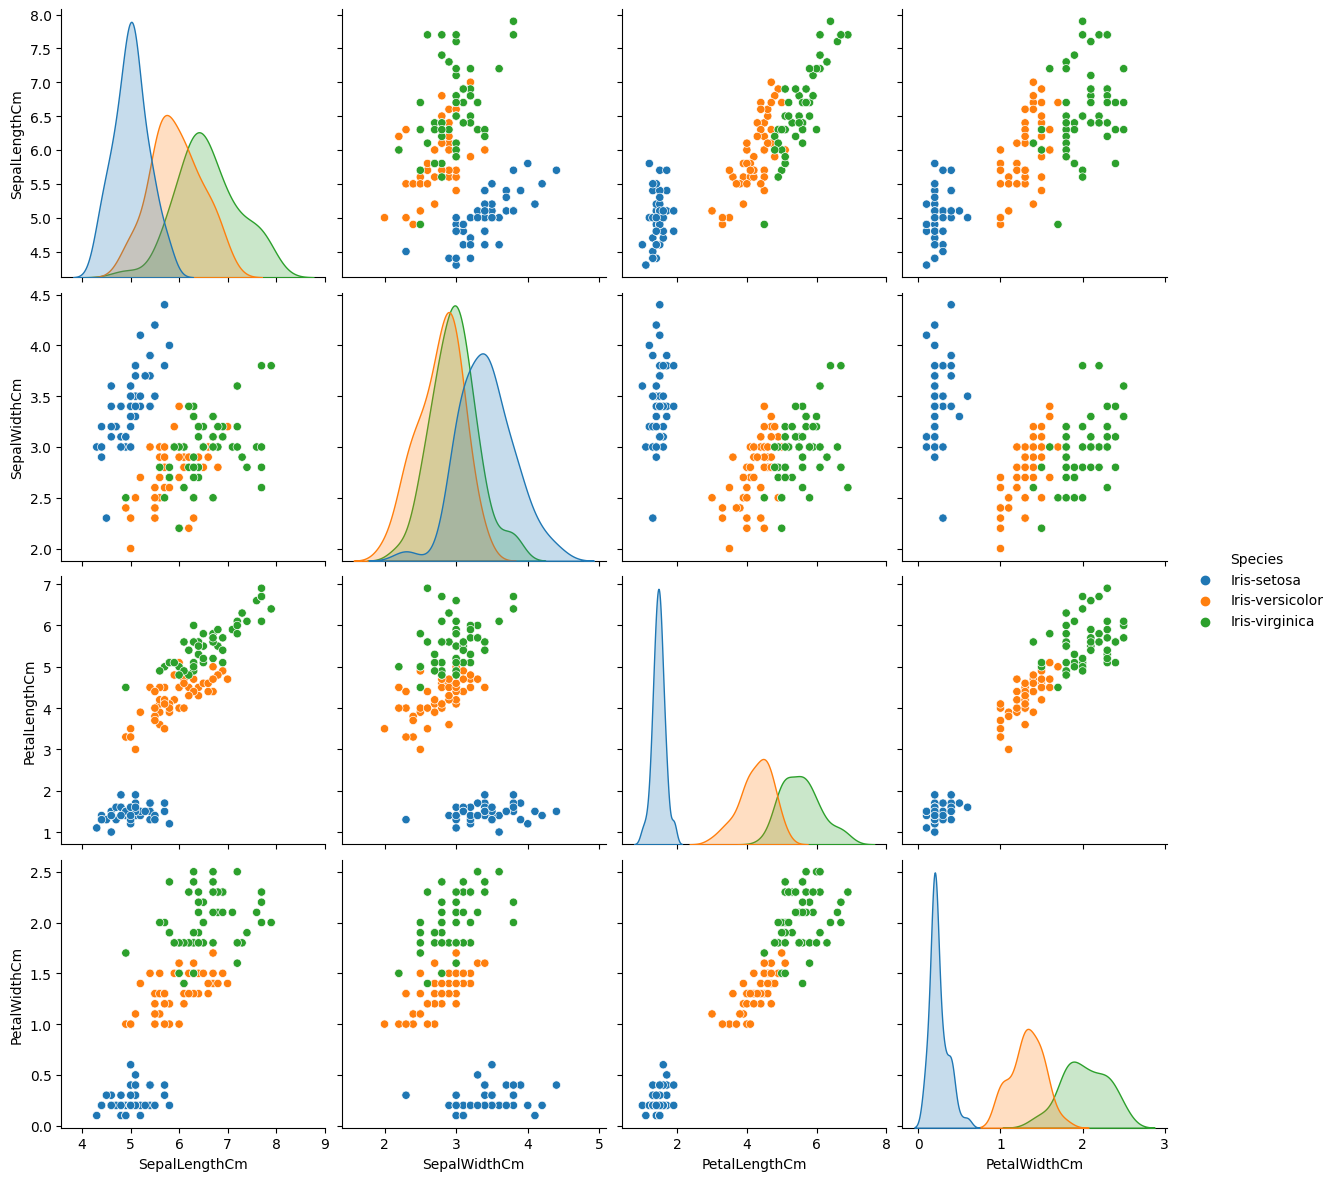

In [251]:
sns.pairplot(data=iris_modified_df, hue='Species', height=3, diag_kind='kde')

Prediction ML

In [337]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [338]:
array = iris_modified_df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Testing different algorithms:

In [280]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

- Evaluating each algorithm

In [314]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {round(cv_results.mean(), 2)}(Accuracy) {round(cv_results.std(), 2)}(STD)")

LR: 0.97(Accuracy) 0.04(STD)
LDA: 0.98(Accuracy) 0.05(STD)
KNN: 0.98(Accuracy) 0.05(STD)
CART: 0.99(Accuracy) 0.03(STD)
NB: 0.98(Accuracy) 0.04(STD)
SVM: 0.99(Accuracy) 0.03(STD)


- Consider running the models a couple of times and getting the average from it:

In [319]:
def run_models(models:list) -> list:
    results = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append((name, cv_results.mean(), cv_results.std()))
        
    return results

In [326]:
n_times = 4
labels = ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']
addition = {key:[0, 0] for key in labels}

for _ in range(n_times):
    cycle_results = run_models(models=models)

    for r in cycle_results:
        key, avg, std = r
        
        addition[key][0] += avg
        addition[key][1] += std


for key in addition.keys():
    addition[key][0] /= n_times 
    addition[key][1] /= n_times 

- Based on the mean the model with highest accuracy is:

In [335]:
max_list = max(addition.values(), key=lambda x: x[0])
key = [k for k, v in addition.items() if v == max_list][0]
print(f"{key}: {round(addition[key][0], 2)} (Accuracy) {round(addition[key][1], 2)} (STD)")

SVM: 0.99 (Accuracy) 0.03 (STD)


- Make predictions using SVM since it has highest accuracy score:

In [306]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

- Evaluating predictions:

[Text(0.5, 1.0, 'SVM (Model) Confussion Matrix\nAccuracy: 0.933')]

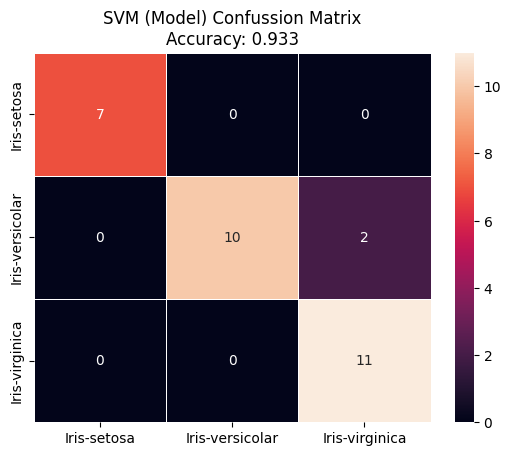

In [348]:
title = f"SVM (Model) Confussion Matrix\nAccuracy: {round(accuracy_score(Y_validation, predictions), 3)}"
cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), index=[
                  'Iris-setosa', 'Iris-versicolar', 'Iris-virginica'], columns=['Iris-setosa', 'Iris-versicolar', 'Iris-virginica'])
sns_graph = sns.heatmap(data=cm, annot=True, linewidths=0.5)
sns_graph.set(title=title)


In [351]:
""" 
    True Positive = Case was positive and was predicted positive. (TP)
    True Negative = Case was negative and was predicted negative. (TN)
    False Negative = Case was positive but predicted negative. (FN)
    False Positive = Case was negative but predicted positive. (FP)


    Precision: 
        - What percentage of your predictions were correct?
        - Refers the accuracy of positive predictions
            precision = TP / (TP + FP)

    Recall:
        - What percentage of the positive cases did you catch?
        - Fraction of positives that were correctly identified
            recall = TP / (TP + FN)

    F1-Score:
        - What percentage of positive predictions were correct?
        - Weighted harmonic mean of precision and recall.
            f1-score = 2 * (Recall * Precision) / (Recall + Precision)
"""
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

